当你在网上搜索答案的时候，你会遇到各种实现的方法，如果你只是单纯的把找到的答案copypaste，那总有一天你会和我一样崩溃。感觉自己就是个没有谷哥就不会画图的傻子。。。

所以，如果你：

学习matplotlib的时候是从标题类似于"五分钟教你matplotlib画图” 这种教程开始的
起码知道这一句 'import matplotlib.pyplot as plt'
遇到稍微复杂的细节就要一顿查，遇到修改xy坐标，名称，等等就头大
打开matplotlib的官方指南，不止一次，但是一脸懵逼
在这几个词 figure, axes, axis 在matplotlib出现时就一脸完了的表情
那么你不是一个人。我一直和你在一起。

所以这份指南是用来（尝试）解决这个问题的。我们花短短的时间，来从根本上了解一下matplotlib的架构，各种名词是什么意思，一个正常的画图程序是什么。

# `plt.***` 和 `ax.***`的区别
我认为所有不先讲清楚`plt.***`和`ax.***` 两种画图方式的区别的教程都是耍流氓。一上来就告诉你，`plt.figure()`, `plt.plot()`, `plt.show()`，这么画就对了的，都是不负责任的表现！

## 在matplotlib中，有两种画图方式：
**`plt.figure()`**： `plt.***`系列。通过`plt.xxx` 来画图，其实是取了一个捷径。这是通过matplotlib提供的一个api，这个plt提供了很多基本的function可以让你很快的画出图来，但是如果你想要更细致的精调，就要使用另外一种方法。

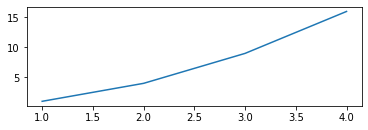

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
A = np.arange(1,5)
B = A**2
C = A**3


plt.figure(1)  
plt.subplot(211)   
plt.plot(A,B)   
plt.show()

`fig, ax = plt.subplots()`: 这个就是正统的稍微复杂一点的画图方法了。指定figure和axes，然后对axes单独操作。等下就讲figure和axes都神马意思。

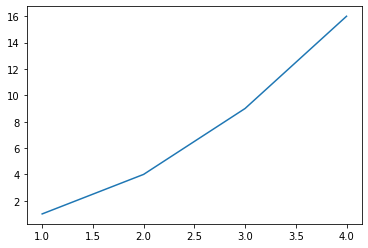

In [4]:
fig, ax = plt.subplots()   
ax.plot(A,B)

大部分的新手教程，都是以`plt.xxx`开始的。我个人认为这不是一个很好的方式。的确, `plt.xxx`简单易懂上手快，但是plt把matplotlib的结构看成一个blackbox，新手在不知道这个lib到底是如何运作的情况下以为自己上手了，可是当你需要细调你的图的时候，你就发现你完全不明白网上的人为什么要用`ax.xxx`， 为什么还有其他那么多种方式来加题目。这样的学习过程是非常不利于长期发展的。
因此，从我这个傻子的经验，我强烈建议在初学matplotlib的时候，尽量避免使用`plt.xxx`系列。当你明白`figure/axes/axis`都是控制什么的时候，如果你想要简单的制作一个quick and dirty的图，用`plt.xxx`才是OK。

# 名词解释 in matplotlib
matplotlib的名词定于对于非英语母语的人来说实在是太不友好了。尤其是axes。仰天长啸。

从官方借了个图:

![matplotlib-1](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-1_20191129203615.png)

+ `Figure fig = plt.figure()`: 可以解释为画布。
    + 画图的第一件事，就是创建一个画布figure，然后在这个画布上加各种元素。

+ `Axes ax = fig.add_subplot(1,1,1)`: 不想定义，没法定义，就叫他axes！
    + 首先，这个不是你画图的xy坐标抽！
    + 希望当初写这个lib的时候他们用一个更好的名字。。。
    + 可以把axes理解为你要放到画布上的各个物体。比如你要画一个太阳，一个房子，一个车在画布上，那么太阳是一个axes，房子是一个axes，etc。
    + 如果你的figure只有一张图，那么你只有一个axes。如果你的figure有subplot，那么每一个subplot就是一个axes
    + axes是matlibplot的宇宙中心！axes下可以修改编辑的变量非常多，基本上能包含你的所有需求。
+ `Axis ax.xaxis/ax.yaxis`: 对，这才是你的xy坐标轴。
    + 每个坐标轴实际上也是由竖线和数字组成的，每一个竖线其实也是一个axis的subplot，因此ax.xaxis也存在axes这个对象。对这个axes进行编辑就会修改xaxis图像上的表现。
    
# 图像的各个部位名称
再从使用指南 [User Guide](https://link.zhihu.com/?target=https%3A//matplotlib.org/tutorials/introductory/usage.html) 借个图。每个部分的名称指南，这样当你想修改一个部位的时候，起码知道关键字啊。

![matplotlib-2](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-2_20191129203903.png)

## 一步一步来，用传统方法画个图
下面就是实战。用调取ax的方式来画个图。不要用plt！！

# 首先，搞个画布
我喜欢用这个命令来开始画图。哪怕你没有subplot，也可以用这个subplots来创建一个画布。

这个function创建了一个大小为（14，7）的画布，把这个画布赋值给变量fig，同时在这个画布上创建了一个axes，把这个axes赋值给ax。这样，所有未来的`fig.xxx`都是对这个画布的操作，所有`ax.xxx`都是对这个axes的操作。

如果你有两个图，那么ax是一个有两个元素`ax[0]`,`ax[1]` 的list。`ax[0]`就对应第一个subplot的ax。

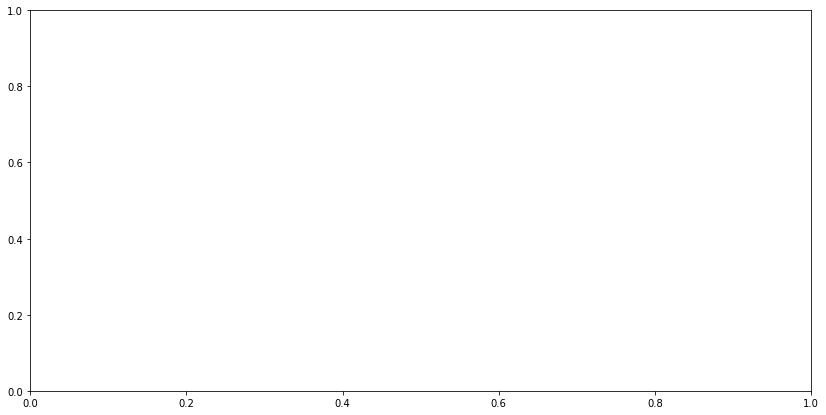

In [5]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

# 好了画布搞好了，画数据。
注意，我们这里依然不使用plt！因为我们要在这个axes上画数据，因此就用ax.plot()来画。画完第一个再call一次，再画第二个。

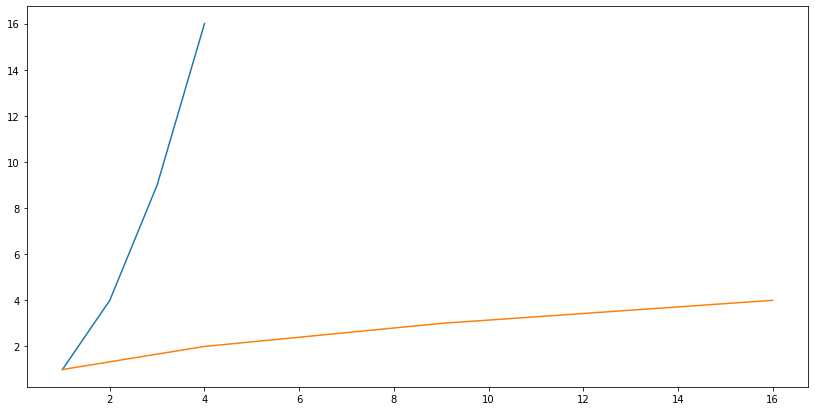

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)


# 下面开始细节的处理
数据画好了就可以各种细调坐标轴啊，tick啊之类的。

首先把标题和xy坐标轴的标题搞定。Again, 不用plt。直接在axes上进行设定。

No handles with labels found to put in legend.


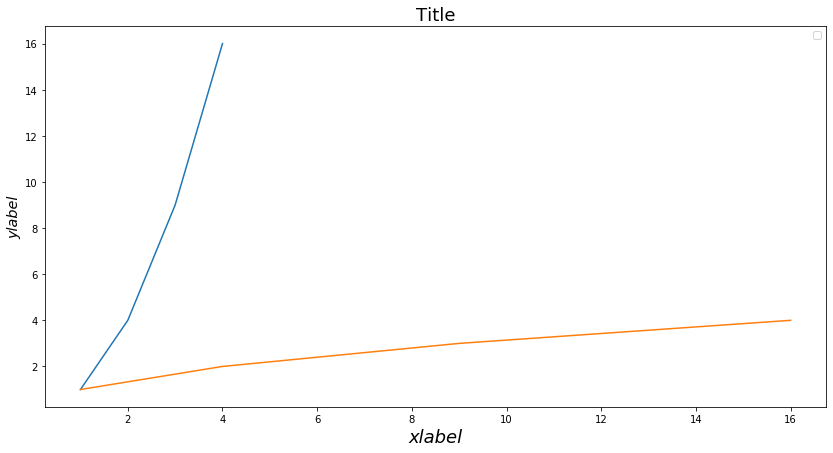

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

然后是xy坐标轴的一些属性设定, 也是在axes level上完成的

No handles with labels found to put in legend.


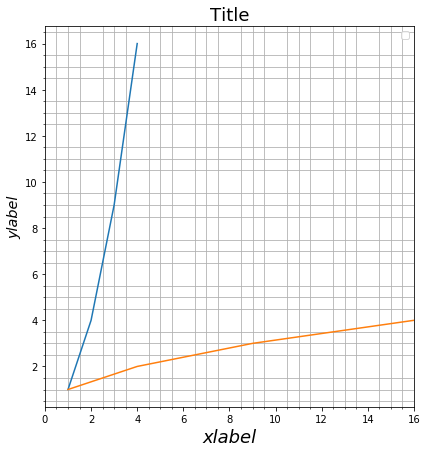

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

最后是坐标轴tick和细节，这个在axes.xaxis or axes.yaxis上完成。

No handles with labels found to put in legend.


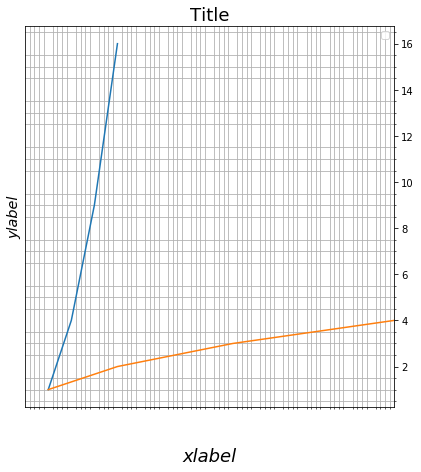

In [16]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B)
ax.plot(B,A)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w') 
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()